<a href="https://colab.research.google.com/github/ImSOOHO/KDB_Public/blob/main/koGPT(WordNet%EA%B8%B0%EB%B0%98_%EC%A6%9D%EA%B0%95%EB%B0%A9%EC%8B%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본 세팅

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/포트폴리오 프로젝트/NLP 프로젝트/데이터/전처리V4(중립삭제, 중복삭제).csv', encoding = 'utf-8-sig', index_col=0)

In [ ]:
df

,store_category,content,content_clean,processed_review_final,sentiment,probability
store_name,,,,,,
335kitchen 광교아브뉴프랑점,샤브샤브,아이들이랑 자주오는데 먹을게 많아서 좋아요시간도 널널해서 부담없이 먹고 디저트까지 ...,아이들이랑 자주오는데 먹을게 많아서 좋아요시간도 널널해서 부담없이 먹고 디저트까지 ...,아이들이랑 자주오는데 먹을게 많아서 좋아요시간도 널널해서 부담없이 먹고 디저트까지 ...,2,"[4.901258580503054e-05, 0.9998929500579834, 5...."
335kitchen 광교아브뉴프랑점,샤브샤브,음식도 신선하고 자리도 편하고 즐거운 시간이었네요,음식도 신선하고 자리도 편하고 즐거운 시간이었네요,음식도 신선하고 자리도 편하고 즐거운 시간이었네요,2,"[6.318657688098028e-05, 0.9998565912246704, 8...."
335kitchen 광교아브뉴프랑점,샤브샤브,명절이라 가족모임으로 예약하고 왔는데 샤브샤브 외에도 음식 종류가 많고 맛있어서 가...,명절이라 가족모임으로 예약하고 왔는데 샤브샤브 외에도 음식 종류가 많고 맛있어서 가...,명절이라 가족모임으로 예약하고 왔는데 샤브샤브 음식 종류가 많고 맛있어서 가족 모두...,2,"[4.202880518278107e-05, 0.9999101161956787, 4...."
335kitchen 광교아브뉴프랑점,샤브샤브,오늘은 설이라서 그런지 육전도 있네요. 항상 만족하면서 먹는 곳이예요. 맛있어요,오늘은 설이라서 그런지 육전도 있네요 항상 만족하면서 먹는 곳이예요 맛있어요,오늘은 설이라서 그런지 육전도 있네요 항상 만족하면서 먹는 곳이예요 맛있어요,2,"[4.374870695755817e-05, 0.999896764755249, 5.9..."
335kitchen 광교아브뉴프랑점,샤브샤브,재료도 신선하고 샐러드바 음식들도 맛있네요!가족들끼리 오기 완전 좋아요~가족모임으로...,재료도 신선하고 샐러드바 음식들도 맛있네요가족들끼리 오기 완전 좋아요가족모임으로 추...,재료도 신선하고 샐러드바 음식들도 맛있네요가족들끼리 오기 완전 좋아요가족모임으로 추...,2,"[4.362393883639015e-05, 0.9999017715454102, 5...."
...,...,...,...,...,...,...
제일회관 인계직영점,요리주점,"분위기도 좋고, 직원분들이 친절하세요😄감자전은 존맛!",분위기도 좋고 직원분들이 친절하세요감자전은 정말 맛있다,분위기도 좋고 직원분들이 친절하세요감자전은 정말 맛있다,2,"[0.8400479555130005, 0.1587081104516983, 0.001..."
제일회관 인계직영점,요리주점,"분위기도 좋고, 직원분들이 친절하세요😄감자전은 존맛!",분위기도 좋고 직원분들이 친절하세요감자전은 정말 맛있다,분위기도 좋고 직원분들이 친절하세요감자전은 정말 맛있다,2,"[0.8400479555130005, 0.1587081104516983, 0.001..."
제일회관 인계직영점,요리주점,"분위기도 좋고, 직원분들이 친절하세요😄감자전은 존맛!",분위기도 좋고 직원분들이 친절하세요감자전은 정말 맛있다,분위기도 좋고 직원분들이 친절하세요감자전은 정말 맛있다,2,"[0.8400479555130005, 0.1587081104516983, 0.001..."


In [ ]:
df['store_category'].value_counts()

,count
store_category,
이자카야,7262
요리주점,5996
이탈리아음식,5988
중식당,5657
아시아음식,4187
양식,3310
일식당,2862
소고기구이,2224
인도음식,2075


In [ ]:
category_to_genre = {
    "아시아음식": "기타",
    "베트남음식": "기타",
    "인도음식": "기타",
    "태국음식": "기타",
    "멕시코,남미음식": "기타",

    "요리주점": "주점",
    "이자카야": "주점",
    "맥주,호프": "주점",
    "포장마차": "주점",

    "이탈리아음식": "양식",
    "스파게티,파스타전문": "양식",
    "양식": "양식",
    "퓨전음식": "양식",

    "소고기구이": "한식",
    "닭볶음탕": "한식",
    "곱창,막창,양": "한식",
    "육류,고기요리": "한식",
    "한정식": "한식",
    "칼국수,만두": "한식",
    "돼지고기구이": "한식",
    "주꾸미요리": "한식",
    "샤브샤브": "한식",
    "한식": "한식",

    "중식당": "중식",
    "마라탕": "중식",
    "양꼬치": "중식",

    "일식당": "일식",
    "돈가스": "일식",
    "일본식라면": "일식"
}

# store_genre 칼럼 생성
df["store_genre"] = df["store_category"].map(category_to_genre)

# store_genre 칼럼을 store_category 왼쪽으로 이동
cols = df.columns.tolist()
idx = cols.index("store_category")
cols.insert(idx, cols.pop(cols.index("store_genre")))
df = df[cols]

In [ ]:
df = df.reset_index()

In [ ]:
df.to_csv('전처리V5(음식대분류추가).csv', encoding = 'utf-8-sig',index = False)

In [ ]:
df['store_genre'].value_counts()

,count
store_genre,
주점,13549
양식,9842
기타,9414
한식,8583
중식,7576
일식,5620


# 데이터 증강

In [ ]:
!pip install nlpaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 6.6 MB/s eta 0:00:00


In [ ]:
# 필요한 리소스 다운로드
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')       # 기본 영어 태거
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
df

,store_genre,store_category,content,content_clean,processed_review_final,sentiment,probability
store_name,,,,,,,
335kitchen 광교아브뉴프랑점,한식,샤브샤브,아이들이랑 자주오는데 먹을게 많아서 좋아요시간도 널널해서 부담없이 먹고 디저트까지 ...,아이들이랑 자주오는데 먹을게 많아서 좋아요시간도 널널해서 부담없이 먹고 디저트까지 ...,아이들이랑 자주오는데 먹을게 많아서 좋아요시간도 널널해서 부담없이 먹고 디저트까지 ...,2,"[4.901258580503054e-05, 0.9998929500579834, 5...."
335kitchen 광교아브뉴프랑점,한식,샤브샤브,음식도 신선하고 자리도 편하고 즐거운 시간이었네요,음식도 신선하고 자리도 편하고 즐거운 시간이었네요,음식도 신선하고 자리도 편하고 즐거운 시간이었네요,2,"[6.318657688098028e-05, 0.9998565912246704, 8...."
335kitchen 광교아브뉴프랑점,한식,샤브샤브,명절이라 가족모임으로 예약하고 왔는데 샤브샤브 외에도 음식 종류가 많고 맛있어서 가...,명절이라 가족모임으로 예약하고 왔는데 샤브샤브 외에도 음식 종류가 많고 맛있어서 가...,명절이라 가족모임으로 예약하고 왔는데 샤브샤브 음식 종류가 많고 맛있어서 가족 모두...,2,"[4.202880518278107e-05, 0.9999101161956787, 4...."
335kitchen 광교아브뉴프랑점,한식,샤브샤브,오늘은 설이라서 그런지 육전도 있네요. 항상 만족하면서 먹는 곳이예요. 맛있어요,오늘은 설이라서 그런지 육전도 있네요 항상 만족하면서 먹는 곳이예요 맛있어요,오늘은 설이라서 그런지 육전도 있네요 항상 만족하면서 먹는 곳이예요 맛있어요,2,"[4.374870695755817e-05, 0.999896764755249, 5.9..."
335kitchen 광교아브뉴프랑점,한식,샤브샤브,재료도 신선하고 샐러드바 음식들도 맛있네요!가족들끼리 오기 완전 좋아요~가족모임으로...,재료도 신선하고 샐러드바 음식들도 맛있네요가족들끼리 오기 완전 좋아요가족모임으로 추...,재료도 신선하고 샐러드바 음식들도 맛있네요가족들끼리 오기 완전 좋아요가족모임으로 추...,2,"[4.362393883639015e-05, 0.9999017715454102, 5...."
...,...,...,...,...,...,...,...
제일회관 인계직영점,주점,요리주점,"분위기도 좋고, 직원분들이 친절하세요😄감자전은 존맛!",분위기도 좋고 직원분들이 친절하세요감자전은 정말 맛있다,분위기도 좋고 직원분들이 친절하세요감자전은 정말 맛있다,2,"[0.8400479555130005, 0.1587081104516983, 0.001..."
제일회관 인계직영점,주점,요리주점,"분위기도 좋고, 직원분들이 친절하세요😄감자전은 존맛!",분위기도 좋고 직원분들이 친절하세요감자전은 정말 맛있다,분위기도 좋고 직원분들이 친절하세요감자전은 정말 맛있다,2,"[0.8400479555130005, 0.1587081104516983, 0.001..."
제일회관 인계직영점,주점,요리주점,"분위기도 좋고, 직원분들이 친절하세요😄감자전은 존맛!",분위기도 좋고 직원분들이 친절하세요감자전은 정말 맛있다,분위기도 좋고 직원분들이 친절하세요감자전은 정말 맛있다,2,"[0.8400479555130005, 0.1587081104516983, 0.001..."


In [ ]:
import pandas as pd
import nlpaug.augmenter.word as naw
from sklearn.utils import resample
import nltk
from transformers import (GPT2LMHeadModel, AutoTokenizer, Trainer,
                          TrainingArguments, DataCollatorForLanguageModeling, pipeline)
from torch.utils.data import Dataset
import torch
import re

###############################
# 0. 기본 전처리: 매장 정보 결합
###############################
# 가정: df에는 'store_name', 'store_category', 'processed_review_final', 'sentiment' 칼럼이 있음.
# 결측치는 빈 문자열로 대체.
df['processed_review_final'] = df['processed_review_final'].fillna("").astype(str)
df['store_name'] = df['store_name'].fillna("").astype(str)
df['store_category'] = df['store_category'].fillna("").astype(str)
# 매장 이름, 음식 종류, 리뷰 내용을 결합하여 컨텍스트 추가
df['review_with_context'] = df['store_name'] + " " + df['store_category'] + " 리뷰: " + df['processed_review_final']

In [ ]:
###############################################
# 1. 데이터 증강 및 균형 데이터셋 생성 (Method 1)
###############################################
# sentiment: 2(긍정), 1(중립), 0(부정)
# review_with_context 칼럼을 사용합니다.

nltk.download('wordnet')
nltk.download('omw-1.4')

# 부정 및 중립(소수 클래스) 데이터 추출
df_minority_1 = df[df['sentiment'] != 2]
# 긍정 데이터 추출
df_majority_1 = df[df['sentiment'] == 2]

# 동의어 교체 증강기 초기화 (WordNet 사용)
aug_1 = naw.SynonymAug(aug_src='wordnet')

# 증강 함수: review_with_context 컬럼의 텍스트를 num_augments번 증강
def augment_text_1(text, num_augments=5):
    return [aug_1.augment(text) for _ in range(num_augments)]

# 부정 및 중립 데이터 증강 적용
augmented_rows_1 = []
for idx, row in df_minority_1.iterrows():
    aug_texts = augment_text_1(row['review_with_context'], num_augments=5)
    for text in aug_texts:
        new_row = row.copy()
        new_row['review_with_context'] = text
        augmented_rows_1.append(new_row)

df_augmented_1 = pd.DataFrame(augmented_rows_1)
df_minority_aug_1 = pd.concat([df_minority_1, df_augmented_1], ignore_index=True)

# 긍정 클래스 개수와 맞추기 위해 소수 클래스 재샘플링
target_n_1 = len(df_majority_1)
df_minority_final_1 = resample(df_minority_aug_1,
                               replace=True,
                               n_samples=target_n_1,
                               random_state=42)

# 최종 균형 데이터셋 생성
df_balanced_1 = pd.concat([df_majority_1, df_minority_final_1], ignore_index=True)
df_balanced_1 = df_balanced_1.sample(frac=1, random_state=42).reset_index(drop=True)
print("Method 1 - 증강 후 데이터셋 크기:", df_balanced_1.shape)

# 1-1. 데이터 샘플 줄이기 (전체의 10%만 사용)
df_sampled = df_balanced_1.sample(frac=0.1, random_state=42).reset_index(drop=True)
print("프로토타입용 샘플 데이터셋 크기:", df_sampled.shape)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Method 1 - 증강 후 데이터셋 크기: (124784, 8)
프로토타입용 샘플 데이터셋 크기: (12478, 8)


In [ ]:
df_balanced_1.to_csv('증강데이터.csv', encoding='utf-8-sig', index=False)

In [ ]:
###############################################
# 2. KoGPT2 파인튜닝 및 리뷰 생성 (프로토타입용)
###############################################
# 모델과 토크나이저 로드 (KoGPT2 예시)
model_name = "skt/kogpt2-base-v2"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# ReviewDataset 클래스: review_with_context 칼럼 사용, 빈 문자열 및 리스트 처리 포함.
class ReviewDataset(Dataset):
    def __init__(self, texts, tokenizer, max_length=128):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        if isinstance(text, list):
            text = " ".join(text)
        if not text.strip():
            text = " "
        encoding = self.tokenizer(
            text,
            truncation=True,
            max_length=self.max_length,
            padding="max_length",
            return_tensors="pt"
        )
        input_ids = encoding.input_ids.squeeze()
        attention_mask = encoding.attention_mask.squeeze()
        return {"input_ids": input_ids, "attention_mask": attention_mask, "labels": input_ids}

# 데이터셋 생성: 샘플 데이터셋에서 review_with_context 사용
texts = df_sampled['review_with_context'].tolist()
dataset = ReviewDataset(texts, tokenizer, max_length=128)
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

# TrainingArguments (프로토타입용 빠른 학습)
training_args = TrainingArguments(
    output_dir="./kogpt2_review_prototype",
    report_to="none",
    num_train_epochs=1,
    per_device_train_batch_size=2,
    learning_rate=5e-5,
    warmup_steps=100,
    logging_steps=50,
    save_steps=100,
    save_total_limit=1,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset,
)

print("파인튜닝 시작...")
trainer.train()


파인튜닝 시작...


Step,Training Loss
50,3.706300
100,3.163000
150,2.411400
200,2.783600
250,2.531900
300,2.547000
350,2.512200
400,2.525900
450,2.179900
500,2.271200


TrainOutput(global_step=6239, training_loss=1.7412666477326266, metrics={'train_runtime': 457.2537, 'train_samples_per_second': 27.289, 'train_steps_per_second': 13.645, 'total_flos': 815100493824000.0, 'train_loss': 1.7412666477326266, 'epoch': 1.0})

In [ ]:
###############################
# 3. 리뷰 생성 및 평가
###############################
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# 후처리 함수: 생성된 텍스트가 max_chars보다 길면, 마지막 문장 종결부호에서 자르기.
def postprocess_review(text, max_chars=100):
    if len(text) <= max_chars:
        return text
    truncated = text[:max_chars]
    m = re.search(r'[.!?](?!.*[.!?])', truncated)
    if m:
        end = m.end()
        return truncated[:end].strip()
    else:
        return truncated.strip()

# 프롬프트 제거와 후처리를 포함한 리뷰 생성 함수
def generate_review(prompt, max_length=150, top_k=50, top_p=0.95):
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(device)
    sample_output = model.generate(
        input_ids,
        do_sample=True,
        max_length=max_length,
        top_k=top_k,
        top_p=top_p,
        num_return_sequences=1,
        eos_token_id=tokenizer.eos_token_id
    )
    generated_text = tokenizer.decode(sample_output[0], skip_special_tokens=True)
    if generated_text.startswith(prompt):
        generated_text = generated_text[len(prompt):].strip()
    processed_text = postprocess_review(generated_text, max_chars=100)
    return processed_text

# 긍정 리뷰 100개 생성
positive_reviews = []
for i in range(100):
    pos_review = generate_review("제일회관 인계직영점에 대한 긍정적인 리뷰: ", max_length=150)
    positive_reviews.append(pos_review)
    print(f"긍정 리뷰 {i+1} 생성 완료: {pos_review}")

# 부정 리뷰 100개 생성
negative_reviews = []
for i in range(100):
    neg_review = generate_review("제일회관 인계직영점에 대한 부정적인 리뷰: ", max_length=150)
    negative_reviews.append(neg_review)
    print(f"부정 리뷰 {i+1} 생성 완료: {neg_review}")


긍정 리뷰 1 생성 완료: ᄒᄒ 음식도 다양하고 맛있어요 직원분들도 친절하셔요 올게용 ᄒᄒ매장 분위기가 넘 좋아서 자주 이용해야 할 같아요 음식들도 깔끔해서 계속 생각날때가 있어요 인계동 오면 제일회관 강추
긍정 리뷰 2 생성 완료: ᄒᄒ 분위기도 좋고 서비스 너무너무 만족해요매장도 넓고 깔끔하니 좋았어요직원분들도 친절하셔요ᄒᄒ음식도 너무 맛있었습니다자주 올 같아요 올게요ᄒᄒ ᄒᄒ 감사합니다또올게요 ᄒᄒ 번창하
긍정 리뷰 3 생성 완료: ᄋᄋᄋᄋᄋᄋᄋᄋᄋᄋᄋᄋ맛있어요감자전은 정말 맛있다탱 ᄒᄒ무조건 방문 하세용 ᄒᄒᄒ이벤트로 감자전도 주셔서 폭 넓게 먹을수 있었어요매장 인테리어 분위기 넓고 쾌적해요맛있게 잘 먹었습
긍정 리뷰 4 생성 완료: ᄒᄒ 분위기도 좋고 음식들이 정말 맛있어요다음에 오려고요 여러분들 오셔서 맛있는 음식 먹었어요 ᄒᄒ 방문 할게요 ᄒᄒ 인테리어도 깔끔하고 데이트 장소로 딱이에요 ᄒᄒ 분위기도 최고
긍정 리뷰 5 생성 완료: ᄋᄋᄋᄋᄋᄉᄋ 직원분들도 친절하시고 맛있어요 ᄒᄒ 올게용ᄒᄒ 안주도 맛있어요 ᄒᄒ 올게용ᄒ 잘 먹고 갑니다 여러명이서 왔는데 저번에 와서 먹으니 꼭 만족해요 올게용 ᄒ 재방문 의사
긍정 리뷰 6 생성 완료: 얌쌀국수 먹고싶어서 왔어요 ᄋᄋ짱맛있습니다 ᄒᄋ분위기 너무 좋고 데이트장소 분위기 너무 좋네요 ᄒᄒ 올게요강추합니다 ᄒᄒ오세요 ᄒᄒ기념일날 오면 꼭 방문할 같아요 특히 감자전골 넘
긍정 리뷰 7 생성 완료: ᄒᄒ 음식도 맛있고 직원분들도 친절하세요감자전은 정말 맛있다탱  맛있게 잘 먹었어요 ᄒᄒ 앞으로 자주 방문하실 같습니다 ᄒᄒ잘먹구 갑니다 감사합니다 ᄒᄒ 수원 오면 항상 들릴 같아
긍정 리뷰 8 생성 완료: ᄋᄋᄋᄋᄋᄋᄋᄋᄋᄋᄋᄋᄋᄋᄋᄋᄋᄋᄋᄋ 잘 먹었습니다 감사합니다 직원분들도 친절하시고 분위기도 좋아요 또올게요 감사합니다 번창하세요ᄒᄒ 재방문 의사 있습니다 최고입니다 재방문의사 백
긍정 리뷰 9 생성 완료: ᄒᄒ안주가 너무 맛있어서 자주올게용닭발보단 매콤해서 맛나요밑반찬도 잘먹었어용매장도 크고 직원분들도 친절

In [ ]:
# -------------------------------
# 4. 자동 감성 평가 및 문법 평가 (Perplexity)
# -------------------------------
# 미리 학습된 감성 분류기 로드 (다국어 지원 모델 사용)
sentiment_classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

def evaluate_sentiment(text):
    result = sentiment_classifier(text)[0]
    # nlptown 모델은 "1 star", "2 stars", ... 형태의 label을 출력합니다.
    return result['label'], result['score']

def calculate_perplexity(text, model, tokenizer):
    encodings = tokenizer(text, return_tensors='pt')
    input_ids = encodings.input_ids.to(model.device)
    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
        loss = outputs.loss
    return torch.exp(loss).item()

# 평가 결과 수집 (기존 코드)
eval_results = []
all_reviews = positive_reviews + negative_reviews
intended_labels = ["positive"] * 100 + ["negative"] * 100
for review, intended in zip(all_reviews, intended_labels):
    pred_label, pred_score = evaluate_sentiment(review)
    ppl = calculate_perplexity(review, model, tokenizer)
    eval_results.append({
        "review": review,
        "intended": intended,
        "predicted_sentiment": pred_label,
        "sentiment_score": pred_score,
        "perplexity": ppl
    })

# 평가 결과 DataFrame 생성
df_eval = pd.DataFrame(eval_results)

# 기존 생성된 리뷰 DataFrame (긍정, 부정 리뷰 및 감성 라벨)
df_reviews = pd.DataFrame({
    "review": all_reviews,
    "sentiment": intended_labels
})

df_reviews_1 = pd.concat([df_reviews, df_eval.drop(columns=["review", "intended"])], axis=1)

Device set to use cuda:0


* predicted_sentiment: 1 star(부정적)~ 5 star(긍정적)
* sentiment_score: 0~1, 모델이 얼마나 결과에 대해 신뢰하는지, 1에 가까울수록 높은 확신
* perplexity: 1 ~ 무한, 20~50 양호, 그 이상은 난해한 문장, 문장의 일관성, 자연스러움, 예측 가능성 등을 평가


In [ ]:
df_reviews_1.head()

,review,sentiment,predicted_sentiment,sentiment_score,perplexity
0,ᄒᄒ 음식도 다양하고 맛있어요 직원분들도 친절하셔요 올게용 ᄒᄒ매장 분위기가 넘 좋...,positive,3 stars,0.396066,9.450661
1,ᄒᄒ 분위기도 좋고 서비스 너무너무 만족해요매장도 넓고 깔끔하니 좋았어요직원분들도 ...,positive,3 stars,0.381497,4.671552
2,ᄋᄋᄋᄋᄋᄋᄋᄋᄋᄋᄋᄋ맛있어요감자전은 정말 맛있다탱 ᄒᄒ무조건 방문 하세용 ᄒᄒᄒ이...,positive,1 star,0.341072,5.909666
3,ᄒᄒ 분위기도 좋고 음식들이 정말 맛있어요다음에 오려고요 여러분들 오셔서 맛있는 음...,positive,5 stars,0.372642,5.758121
4,ᄋᄋᄋᄋᄋᄉᄋ 직원분들도 친절하시고 맛있어요 ᄒᄒ 올게용ᄒᄒ 안주도 맛있어요 ᄒᄒ ...,positive,1 star,0.299429,5.085239


In [ ]:
positive_reviews

['제일회관 인계직영점에 대한 긍정적인 리뷰: ᄋᄋ맛집입니다 인테리어도 시원합니다 번창하시길 바랍니다맛도 완전 완전 굿굿이에요 특히 명란관자가 진짜맛잇네요 국물이 깊고 맛있어요ᄒᄒ 직원분들이 매우 친절하시네요 재방문의사 백프로입니다ᄒᄒᄒ 최고입니다 진짜 친절하시고 인테리어도 완벽하고 직원분들도 친절하시',
 '제일회관 인계직영점에 대한 긍정적인 리뷰: 오새우 너무 맛있고 친절하세요 가게이쁘고 깨끗합니다 감사합니다그리고 정말 최고입니다 가게의 분위기가 완전 좋아요 직원분들 친절하고 퀄리티도 최고입니다추천합니다사장님 친절하세요ᄒᄒ잘 먹고 갑니다 ᄒᄒ또 올게요 ᄒᄒ매장도 깔끔하고 쾌적합니다 맛도',
 '제일회관 인계직영점에 대한 긍정적인 리뷰: ᄏ가게도 크고 깔끔하고 좋은 분위기에 비해 너무 좋았습니다 잘 먹었습니다 ᄒᄒ 잘 먹었어요 ᄒᄒ 다음에는 음식도 먹어보고 싶습니다 다음에도 방문할게요 ᄒᄒ ᄒ 맛있고 잘 먹었습니다 번창하세요 번창하세요 ᄒᄒ 데이트 장소 추천메뉴 다 맛있어요 ᄒᄒ ᄒ 여러 테이블에서 먹고 싶',
 '제일회관 인계직영점에 대한 긍정적인 리뷰: 쉐오롱너무 맛있는 일식집 ᅲ ᅲ볶음밥이 너무너무 푸짐하니까 짱좋아요특히 해산물 양이 많은 듯 했습니다 식전빵부터 너무 맛있어요 ᅲ 뇨끼는 말렌느낌 넘나 최고입니다 새우오뎅도 엄청 부드럽고 매콤하니 맛있었고 특히 바질크림파스타 꼭 드세용ᄒ',
 '제일회관 인계직영점에 대한 긍정적인 리뷰: 팟타이가 대박이네요 얌꿍도 맛있네요 팟타이는 처음먹어보는데 너무 맛있었습니다 직원분들도 너무 친절하시고 ᄒᄒ특히 테이블 간격도 좁아서 데이트하기도 좋았어요 인계동일 점심시간에는 방문했습니다 직원분들도 너무 친절하시고요 ᄒᄒ 점심에도 오셔야죠 맛있고',
 '제일회관 인계직영점에 대한 긍정적인 리뷰: ᄒᄒ 자주가요 오시면 올게요 맛있는 오뎅과 딤섬에 시켜서 먹었는데 맛있었습니다 특히 정식 딤섬이 ppk키친이라는게 매력적이라 ᄒᄒ음식 퀄리티있는 매콤한거 추천입니다 특히 주방장이 생각보다 엄청 넓고 쾌적합니다 ᄒᄒ직원분들이 친절하

In [ ]:
negative_reviews

['제일회관 인계직영점에 대한 부정적인 리뷰: 괜찮아요 올게요 안주가 맛있고 정말 좋아요 사장님이 직접 다 구워주셔서 맛있는 음식 먹고 싶어요 ᄒᄒ 잘먹었습니다 잘먹었습니다 ᄒᄒ잘 먹었습니다 ᄒᄒ 인계직원 분들도 너무 친절하셔요 인테리어도 깔끔하고 맛도 굿굿잘 먹었어요 매장도 분위기도 너무좋고 직원분들도 너무 친절',
 '제일회관 인계직영점에 대한 부정적인 리뷰: 오새우랑 너무 맛있어요 사장님도 친절하시고 매장도 너무 깨끗하고 분위기도 좋아서 자주 와야겠어요 친절하시고 맛있는 음식 많이 먹어보신다면 만족스러워요 ᄒᄒ 번창하세요 ᄒᄒ 맛있어요 추천합니당ᄒᄒ 수원에 오신다면 추천 합니당 ᄒᄒ 직원분이랑 오랜만에 방문한 가게인거같아요 감사합',
 '제일회관 인계직영점에 대한 부정적인 리뷰: 괜찮았습니다친절해요분위기는 좋은데 음식이 맛있어서 아쉬웠어요잘 먹었습니다 재방문의사 백백있어요 메뉴의 종류가 많은데 너무 다양하고 특색이 없었는데 여긴 일부러 찾아오더라구요추천합니다 번창하세요ᄒᄒ 직원분들도 만족스러웠어요다음에 방문 할게요 꼭 추천해드립니다ᄒᄒ 음식',
 '제일회관 인계직영점에 대한 부정적인 리뷰: 쌀국수랑 보리굴비 짱맛집입니다 밥도 깔끔하고 맛있어요 보리굴비 맛있게 잘 먹었어요 잘 먹었습니다 사장님께서 정말 친절하시고 친절하게 대해주셔서 감사합니다 다음에는 와야겠어요 감사합니다 매장도 깔끔하고 친절하고 음식도 깔끔해서 좋았어요 자주 올게요 감사합',
 '제일회관 인계직영점에 대한 부정적인 리뷰: ᄒᄒ 음식점이 되게맛있어요 가게도 넓고 직원분들도 친절하세요 매장도 엄청 넓고 깔끔해서 데이트하기에도 좋은곳같아요 올때마다 직원분들 너무친절하십니다 ᄒᄒ 잘먹었습니다 재방문 의사 백입니다 번창하세요 ᄒᄒ 자주올게요 ᄒᄒ 올게요 ᄒᄒ 직원분들도 친절',
 '제일회관 인계직영점에 대한 부정적인 리뷰: 쭈꾸미집 맛있다는 평이 있었어요재방문의사 있음쭈꾸미집추천합니다잘 먹었습니다 재방문의사 백프로입니다직원분들도 너무 친절하셔서 기분좋게 식사하고 가요 잘먹었습니다 가게분위기도 너무

In [ ]:
df_balanced_1['sentiment'].value_counts()

,count
sentiment,
2,62392
1,44683
0,17709


# 다빈이는 여기서 부터(데이터 프레임은 내가 코드랑 같이 보내준 전처리V5 파일로 진행)



In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/포트폴리오 프로젝트/NLP 프로젝트/데이터/전처리V5(음식대분류추가).csv', encoding = 'utf-8-sig')

In [ ]:
df

,store_name,store_genre,store_category,content,content_clean,processed_review_final,sentiment,probability
0,335kitchen 광교아브뉴프랑점,한식,샤브샤브,아이들이랑 자주오는데 먹을게 많아서 좋아요시간도 널널해서 부담없이 먹고 디저트까지 ...,아이들이랑 자주오는데 먹을게 많아서 좋아요시간도 널널해서 부담없이 먹고 디저트까지 ...,아이들이랑 자주오는데 먹을게 많아서 좋아요시간도 널널해서 부담없이 먹고 디저트까지 ...,2,"[4.901258580503054e-05, 0.9998929500579834, 5...."
1,335kitchen 광교아브뉴프랑점,한식,샤브샤브,음식도 신선하고 자리도 편하고 즐거운 시간이었네요,음식도 신선하고 자리도 편하고 즐거운 시간이었네요,음식도 신선하고 자리도 편하고 즐거운 시간이었네요,2,"[6.318657688098028e-05, 0.9998565912246704, 8...."
2,335kitchen 광교아브뉴프랑점,한식,샤브샤브,명절이라 가족모임으로 예약하고 왔는데 샤브샤브 외에도 음식 종류가 많고 맛있어서 가...,명절이라 가족모임으로 예약하고 왔는데 샤브샤브 외에도 음식 종류가 많고 맛있어서 가...,명절이라 가족모임으로 예약하고 왔는데 샤브샤브 음식 종류가 많고 맛있어서 가족 모두...,2,"[4.202880518278107e-05, 0.9999101161956787, 4...."
3,335kitchen 광교아브뉴프랑점,한식,샤브샤브,오늘은 설이라서 그런지 육전도 있네요. 항상 만족하면서 먹는 곳이예요. 맛있어요,오늘은 설이라서 그런지 육전도 있네요 항상 만족하면서 먹는 곳이예요 맛있어요,오늘은 설이라서 그런지 육전도 있네요 항상 만족하면서 먹는 곳이예요 맛있어요,2,"[4.374870695755817e-05, 0.999896764755249, 5.9..."
4,335kitchen 광교아브뉴프랑점,한식,샤브샤브,재료도 신선하고 샐러드바 음식들도 맛있네요!가족들끼리 오기 완전 좋아요~가족모임으로...,재료도 신선하고 샐러드바 음식들도 맛있네요가족들끼리 오기 완전 좋아요가족모임으로 추...,재료도 신선하고 샐러드바 음식들도 맛있네요가족들끼리 오기 완전 좋아요가족모임으로 추...,2,"[4.362393883639015e-05, 0.9999017715454102, 5...."
...,...,...,...,...,...,...,...,...
54579,제일회관 인계직영점,주점,요리주점,"분위기도 좋고, 직원분들이 친절하세요😄감자전은 존맛!",분위기도 좋고 직원분들이 친절하세요감자전은 정말 맛있다,분위기도 좋고 직원분들이 친절하세요감자전은 정말 맛있다,2,"[0.8400479555130005, 0.1587081104516983, 0.001..."
54580,제일회관 인계직영점,주점,요리주점,"분위기도 좋고, 직원분들이 친절하세요😄감자전은 존맛!",분위기도 좋고 직원분들이 친절하세요감자전은 정말 맛있다,분위기도 좋고 직원분들이 친절하세요감자전은 정말 맛있다,2,"[0.8400479555130005, 0.1587081104516983, 0.001..."
54581,제일회관 인계직영점,주점,요리주점,"분위기도 좋고, 직원분들이 친절하세요😄감자전은 존맛!",분위기도 좋고 직원분들이 친절하세요감자전은 정말 맛있다,분위기도 좋고 직원분들이 친절하세요감자전은 정말 맛있다,2,"[0.8400479555130005, 0.1587081104516983, 0.001..."
54582,제일회관 인계직영점,주점,요리주점,"분위기도 좋고, 직원분들이 친절하세요😄감자전은 존맛!",분위기도 좋고 직원분들이 친절하세요감자전은 정말 맛있다,분위기도 좋고 직원분들이 친절하세요감자전은 정말 맛있다,2,"[0.8400479555130005, 0.1587081104516983, 0.001..."


In [ ]:
df['store_genre'].value_counts()

,count
store_genre,
주점,13549
양식,9842
기타,9414
한식,8583
중식,7576
일식,5620


In [ ]:
print(df['store_genre'].value_counts().sum())

54584


# 데이터 증강 V2

In [ ]:
# 0. 필수 패키지 설치 (Colab 또는 Notebook 환경)
!pip install nlpaug transformers torch scikit-learn matplotlib seaborn bert-score konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# -*- coding: utf-8 -*-
"""
전체 파이프라인: 전처리 → 증강 → 모델 파인튜닝 → 리뷰 생성 → 평가 및 시각화

사용 라이브러리 및 모델:
- 전처리/증강: nlpaug (WordNet 기반 동의어 치환)
- 모델: KoGPT2 (skt/kogpt2-base-v2)
- 평가:
    * 감성 분석: nlptown/bert-base-multilingual-uncased-sentiment
    * 유창성: koGPT2 Perplexity
    * 의미적 일관성: bert-score (모델: monologg/kobert, 한국어 lang="ko")
    * 감성분석(ABSA): KR-FinBERT ABSA (예시로 "sangwoong9/kr-finbert" 사용)
    * 다양성: Distinct-2 (KoNLPy의 Okt 토크나이저)
"""

# 1. 필요한 라이브러리 임포트
import pandas as pd
import nlpaug.augmenter.word as naw
from sklearn.utils import resample
import nltk
import re
import torch
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import (GPT2LMHeadModel, AutoTokenizer, Trainer,
                          TrainingArguments, DataCollatorForLanguageModeling, pipeline)
from torch.utils.data import Dataset

# bert-score (koBERTscore)용 임포트
from bert_score import score as bertscore_score

# KoNLPy의 Okt 토크나이저 (Distinct-2 계산용)
from konlpy.tag import Okt
okt = Okt()

# nltk 리소스 다운로드
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

# 2. 데이터 로드 및 기본 전처리
# 가정: 데이터는 df 변수에 로드되어 있으며, 칼럼은 아래와 같습니다.
#   - store_name: 식당 이름
#   - store_genre: 식당 대분류
#   - store_category: 식당 소분류
#   - content: 한국어 식당 리뷰
#   - processed_review_final: 토큰화 전 전처리된 텍스트 데이터
#   - sentiment: 감성 (0: 부정, 2: 긍정)

# 결측치 처리
for col in ['store_name', 'store_genre', 'store_category', 'content', 'processed_review_final']:
    df[col] = df[col].fillna("").astype(str)

# review_with_context 칼럼 생성 (식당 이름, 대분류, 소분류, 리뷰 텍스트를 결합)
df['review_with_context'] = (df['store_name'] + " " + df['store_genre'] + " " +
                             df['store_category'] + " 리뷰: " + df['processed_review_final'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [ ]:
# 3. 데이터 증강 및 균형 데이터셋 생성
# 여기서는 감성 값 0(부정)와 2(긍정)만 있다고 가정하고, 부정이 소수 클래스라고 가정합니다.

# 만약 정수형이라면, 조건을 아래와 같이 수정합니다.
df_negative = df[df['sentiment'] == 0]
df_positive = df[df['sentiment'] == 2]

# 동의어 치환 증강 (WordNet 사용)
aug = naw.SynonymAug(aug_src='wordnet')

def augment_text(text, num_augments=5):
    return [aug.augment(text) for _ in range(num_augments)]

# 부정 클래스 데이터에 증강 적용
augmented_rows = []
for idx, row in df_negative.iterrows():
    aug_texts = augment_text(row['review_with_context'], num_augments=5)
    for text in aug_texts:
        new_row = row.copy()
        new_row['review_with_context'] = text
        augmented_rows.append(new_row)

df_augmented_neg = pd.DataFrame(augmented_rows)
df_negative_aug = pd.concat([df_negative, df_augmented_neg], ignore_index=True)

# 재샘플링: 긍정 데이터 개수와 맞추기 (긍정이 다수라고 가정)
target_n = len(df_positive)
if target_n == 0:
    raise ValueError("df_positive가 비어 있습니다. sentiment 칼럼의 값이 올바른지 확인해 주세요.")

df_negative_final = resample(df_negative_aug,
                             replace=True,
                             n_samples=target_n,
                             random_state=42)

# 최종 균형 데이터셋 결합 및 셔플
df_balanced = pd.concat([df_positive, df_negative_final], ignore_index=True)
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
print("균형 데이터셋 크기:", df_balanced.shape)

균형 데이터셋 크기: (108660, 9)


In [ ]:
#df_balanced.to_csv('V2증강데이터.csv',encoding = 'utf-8-sig',index=False)

In [ ]:
# 4. KoGPT2 파인튜닝 (전체 균형 데이터 사용)
model_name = "skt/kogpt2-base-v2"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Dataset 클래스: review_with_context 칼럼 사용
class ReviewDataset(Dataset):
    def __init__(self, texts, tokenizer, max_length=128):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        if isinstance(text, list):
            text = " ".join(text)
        if not text.strip():
            text = " "
        encoding = self.tokenizer(
            text,
            truncation=True,
            max_length=self.max_length,
            padding="max_length",
            return_tensors="pt"
        )
        input_ids = encoding.input_ids.squeeze()
        attention_mask = encoding.attention_mask.squeeze()
        return {"input_ids": input_ids, "attention_mask": attention_mask, "labels": input_ids}

#전체 균형 데이터셋으로 Dataset 생성
texts_all = df_balanced['review_with_context'].tolist()
dataset_all = ReviewDataset(texts_all, tokenizer, max_length=128)
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

# data_collator 정의 (누락된 부분 추가)
from transformers import DataCollatorForLanguageModeling
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

# TrainingArguments (전체 데이터를 학습할 수 있도록 파라미터 조정)
training_args = TrainingArguments(
    output_dir="./kogpt2_review_full",
    report_to="none",
    num_train_epochs=3,                # 에포크 수 조정 (필요에 따라 변경)
    per_device_train_batch_size=4,     # 하드웨어에 맞게 조정
    learning_rate=5e-5,
    warmup_steps=500,
    logging_steps=100,
    save_steps=500,
    save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset_all,
)

print("전체 데이터로 파인튜닝 시작...")
trainer.train()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/513M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/513M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.83M [00:00<?, ?B/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


전체 데이터로 파인튜닝 시작...


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Step,Training Loss
100,4.042700
200,2.967800
300,2.659900
400,2.470600
500,2.318900
600,2.381900
700,2.063200
800,1.909100
900,1.850000
1000,1.716700


TrainOutput(global_step=81495, training_loss=0.8353018430853425, metrics={'train_runtime': 14575.2838, 'train_samples_per_second': 22.365, 'train_steps_per_second': 5.591, 'total_flos': 2.129399414784e+16, 'train_loss': 0.8353018430853425, 'epoch': 3.0})

In [ ]:
''' # 전체 균형 데이터셋 중 10%만 샘플링
df_sampled = df_balanced.sample(frac=0.1, random_state=42).reset_index(drop=True)
texts_sampled = df_sampled['review_with_context'].tolist()
dataset_sampled = ReviewDataset(texts_sampled, tokenizer, max_length=128)

# data_collator 정의 (누락된 부분 추가)
from transformers import DataCollatorForLanguageModeling
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)


# TrainingArguments (전체 데이터를 학습할 수 있도록 파라미터 조정)
training_args = TrainingArguments(
    output_dir="./kogpt2_review_sampled",  # 저장 경로도 별도로 지정
    report_to="none",
    num_train_epochs=3,                # 에포크 수 조정 (필요에 따라 변경)
    per_device_train_batch_size=4,     # 하드웨어에 맞게 조정
    learning_rate=5e-5,
    warmup_steps=500,
    logging_steps=100,
    save_steps=500,
    save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,   # data_collator 전달
    train_dataset=dataset_sampled,  # 10% 샘플 데이터셋 사용
)

print("샘플링된 데이터(10%)로 파인튜닝 시작...")
trainer.train()
'''

In [ ]:
# 5. 리뷰 생성
# 각 store_genre별로 500개 리뷰를 생성 (긍정 250개, 부정 250개)
# 또한, 각 store_genre 내에서 store_name 비중을 반영하여 프롬프트에 포함시킵니다.
generated_reviews = []

# 후처리: 생성된 텍스트가 max_chars보다 길면 마지막 문장 종결부호에서 자르기
def postprocess_review(text, max_chars=100):
    if len(text) <= max_chars:
        return text
    truncated = text[:max_chars]
    m = re.search(r'[.!?](?!.*[.!?])', truncated)
    if m:
        end = m.end()
        return truncated[:end].strip()
    else:
        return truncated.strip()

def generate_review(prompt, max_length=150, top_k=50, top_p=0.95):
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model.device)
    sample_output = model.generate(
        input_ids,
        do_sample=True,
        max_length=max_length,
        top_k=top_k,
        top_p=top_p,
        num_return_sequences=1,
        eos_token_id=tokenizer.eos_token_id
    )
    generated_text = tokenizer.decode(sample_output[0], skip_special_tokens=True)
    if generated_text.startswith(prompt):
        generated_text = generated_text[len(prompt):].strip()
    processed_text = postprocess_review(generated_text, max_chars=100)
    return processed_text

# store_genre별로 생성 (원본 df 사용하여 store_name 비중 계산)
store_genres = df['store_genre'].unique()

# 리뷰 생성 시 prompt도 함께 저장 (koBERTscore 평가용 참조)
for genre in store_genres:
    df_genre = df[df['store_genre'] == genre]
    total_genre = len(df_genre)
    # store_name 비율 계산 (각 음식점이 해당 장르 내 차지하는 비율)
    store_name_counts = df_genre['store_name'].value_counts(normalize=True)

    # 각 감성에 대해 250개씩 생성
    for sentiment_label, sentiment_val in [("긍정", "2"), ("부정", "0")]:
        # store_name별 생성 개수 (소수점 반올림)
        gen_counts = {}
        for store_name, ratio in store_name_counts.items():
            count = int(round(ratio * 250))
            gen_counts[store_name] = count
        # 할당합이 250이 안되면 비율이 가장 높은 음식점에 보정
        diff = 50 - sum(gen_counts.values())
        if diff != 0:
            top_store = store_name_counts.idxmax()
            gen_counts[top_store] += diff

        # 각 음식점별로 리뷰 생성
        for store_name, count in gen_counts.items():
            for i in range(count):
                prompt = f"{store_name} {genre}에 대한 {sentiment_label}적인 리뷰: "
                review = generate_review(prompt, max_length=150)
                generated_reviews.append({
                    "store_genre": genre,
                    "store_name": store_name,
                    "target_sentiment": sentiment_label,
                    "prompt": prompt,
                    "generated_review": review
                })
                print(f"[{genre}][{store_name}][{sentiment_label}] 리뷰 생성 {i+1}/{count} 완료")

df_generated = pd.DataFrame(generated_reviews)
print("총 생성된 리뷰 개수:", len(df_generated))  # 예상: 총 3000개

[한식][홍미집 수원점][긍정] 리뷰 생성 1/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 2/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 3/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 4/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 5/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 6/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 7/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 8/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 9/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 10/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 11/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 12/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 13/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 14/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 15/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 16/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 17/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 18/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 19/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 20/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 21/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 22/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 23/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 24/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 25/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 26/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 27/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 28/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 29/34 완료
[한식][홍미집 수원점][긍정] 리뷰 생성 30/34 완료
[한식][홍미집 수원점][긍정] 리

In [ ]:
df_generated

,store_genre,store_name,target_sentiment,prompt,generated_review
0,한식,홍미집 수원점,긍정,홍미집 수원점 한식에 대한 긍정적인 리뷰:,맵긴한데 신라면 정도 맵지않고 아주 조아하는 식감이 있는 맛이었어요 친절해서 맛있게...
1,한식,홍미집 수원점,긍정,홍미집 수원점 한식에 대한 긍정적인 리뷰:,오 맛집 찾아보고 왔는데매장 인테리어가 고급스럽고 맛있어용 ᄒᄒ다음에 올게요 굳굳 ...
2,한식,홍미집 수원점,긍정,홍미집 수원점 한식에 대한 긍정적인 리뷰:,맵기도 적당하고 정말 맛있어요 자주이용합니다 감사합니다 잘먹었습니다 잘먹었어요 최고...
3,한식,홍미집 수원점,긍정,홍미집 수원점 한식에 대한 긍정적인 리뷰:,런치세트 이인세트 주문했는데 너무 맛있었어요ᅲᅮ양도 엄청 많아요ᄒᄒ잘먹었습니다 감사...
4,한식,홍미집 수원점,긍정,홍미집 수원점 한식에 대한 긍정적인 리뷰:,ᄅᄋ정말 맛있다에용 ᄒᄒ재방문의사 백 입니다 굿굿 잘 먹구 가요 ᄒᄒ 잘 먹었습니당...
...,...,...,...,...,...
2297,기타,메콩타이 광교아브뉴프랑점,부정,메콩타이 광교아브뉴프랑점 기타에 대한 부정적인 리뷰:,팟타이 너무 맛있고 푸짐해요아브뉴프랑에 맛집이생기는지 몰라요가격도 착하고 좋아요매장...
2298,기타,메콩타이 광교아브뉴프랑점,부정,메콩타이 광교아브뉴프랑점 기타에 대한 부정적인 리뷰:,양이 적지만 맛있었어요 근데 맛은 있음 그냥 다 맛없고 괜찮은 맛집 아니네요근데 손...
2299,기타,메콩타이 광교아브뉴프랑점,부정,메콩타이 광교아브뉴프랑점 기타에 대한 부정적인 리뷰:,맛있어요 먹고싶네용 담에는 밥말아먹을 거예요 담엔 쌀국수도 먹어보고싶습니다ᄒᄒ 감사...
2300,기타,메콩타이 광교아브뉴프랑점,부정,메콩타이 광교아브뉴프랑점 기타에 대한 부정적인 리뷰:,너무 맛있었어요 음식은 그냥 그랬어요 맛은 진짜 좋았어요 ᄒᄒ 가격도 나쁘지 않고...


In [ ]:
df_generated.to_csv('koGPT_WordNet기반리뷰V2.csv', encoding='utf-8-sig', index=False)

# 성능 평가 및 시각화

In [ ]:
import pandas as pd
import nlpaug.augmenter.word as naw
from sklearn.utils import resample
import nltk
import re
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import (GPT2LMHeadModel, AutoTokenizer, Trainer,
                          TrainingArguments, DataCollatorForLanguageModeling, pipeline)
from torch.utils.data import Dataset
from bert_score import score as bertscore_score
from konlpy.tag import Okt

In [ ]:
!pip install sentence-transformers

In [ ]:
# 6. 평가 지표 계산
from sentence_transformers import SentenceTransformer, util

# (1) nlptown 감성 분석
nlptown_classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
def evaluate_nlptown_sentiment(text):
    result = nlptown_classifier(text)[0]
    return result['label'], result['score']

# (2) koGPT2 Perplexity 계산 함수
def calculate_perplexity(text, model, tokenizer):
    encodings = tokenizer(text, return_tensors='pt')
    input_ids = encodings.input_ids.to(model.device)
    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
        loss = outputs.loss
    return torch.exp(loss).item()

# (3) Sentence-BERT를 이용한 의미적 일관성 (코사인 유사도) 계산 함수
sbert_model = SentenceTransformer("snunlp/KR-SBERT-V40K-klueNLI-augSTS")

def calculate_sbert_score(prompt, review):
    emb_prompt = sbert_model.encode(prompt, convert_to_tensor=True)
    emb_review = sbert_model.encode(review, convert_to_tensor=True)
    cosine_sim = util.pytorch_cos_sim(emb_prompt, emb_review)
    return cosine_sim.item()

# (4) KR-FinBERT ABSA 평가
krfinbert_absa = pipeline("sentiment-analysis", model="snunlp/KR-FinBert")
def evaluate_krfinbert_absa(review):
    result = krfinbert_absa(review)[0]
    return {"label": result['label'], "score": result['score']}

# (5) Distinct-2 계산 (KoNLPy의 Okt 사용)
def calculate_distinct2(text):
    tokens = okt.morphs(text)
    if len(tokens) < 2:
        return 0.0
    bigrams = [(tokens[i], tokens[i+1]) for i in range(len(tokens)-1)]
    return len(set(bigrams)) / len(bigrams)

# koGPT2 모델과 토크나이저 로드 (평가에 사용)
from transformers import GPT2LMHeadModel, AutoTokenizer
kogpt2_model_name = "skt/kogpt2-base-v2"
model = GPT2LMHeadModel.from_pretrained(kogpt2_model_name)
tokenizer = AutoTokenizer.from_pretrained(kogpt2_model_name)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# 평가 결과 수집
eval_results = []
for idx, row in df_generated.iterrows():
    review_text = row['generated_review']
    prompt_text = row['prompt']
    nlptown_label, nlptown_score = evaluate_nlptown_sentiment(review_text)
    ppl = calculate_perplexity(review_text, model, tokenizer)
    sbert_similarity = calculate_sbert_score(prompt_text, review_text)
    krfinbert_result = evaluate_krfinbert_absa(review_text)
    distinct2 = calculate_distinct2(review_text)
    eval_results.append({
        "store_genre": row['store_genre'],
        "store_name": row['store_name'],
        "target_sentiment": row['target_sentiment'],
        "generated_review": review_text,
        "prompt": prompt_text,
        "nlptown_sentiment": nlptown_label,
        "nlptown_score": nlptown_score,
        "perplexity": ppl,
        "sbert_similarity": sbert_similarity,  # Sentence-BERT 유사도 사용
        "krfinbert_sentiment": krfinbert_result['label'],
        "krfinbert_score": krfinbert_result['score'],
        "distinct2": distinct2
    })

df_eval = pd.DataFrame(eval_results)

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/336k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/467M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/967k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/406M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at snunlp/KR-FinBert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/336 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/143k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/294k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/406M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
df_eval

,store_genre,store_name,target_sentiment,generated_review,prompt,nlptown_sentiment,nlptown_score,perplexity,sbert_similarity,krfinbert_sentiment,krfinbert_score,distinct2
0,한식,홍미집 수원점,긍정,맵긴한데 신라면 정도 맵지않고 아주 조아하는 식감이 있는 맛이었어요 친절해서 맛있게...,홍미집 수원점 한식에 대한 긍정적인 리뷰:,2 stars,0.230014,38.798050,0.517535,LABEL_1,0.653925,1.000000
1,한식,홍미집 수원점,긍정,오 맛집 찾아보고 왔는데매장 인테리어가 고급스럽고 맛있어용 ᄒᄒ다음에 올게요 굳굳 ...,홍미집 수원점 한식에 대한 긍정적인 리뷰:,1 star,0.411106,37.857971,0.435726,LABEL_1,0.639585,0.973684
2,한식,홍미집 수원점,긍정,맵기도 적당하고 정말 맛있어요 자주이용합니다 감사합니다 잘먹었습니다 잘먹었어요 최고...,홍미집 수원점 한식에 대한 긍정적인 리뷰:,5 stars,0.437363,38.545727,0.432950,LABEL_1,0.623519,0.965517
3,한식,홍미집 수원점,긍정,런치세트 이인세트 주문했는데 너무 맛있었어요ᅲᅮ양도 엄청 많아요ᄒᄒ잘먹었습니다 감사...,홍미집 수원점 한식에 대한 긍정적인 리뷰:,1 star,0.501538,58.698456,0.436437,LABEL_1,0.626881,0.972222
4,한식,홍미집 수원점,긍정,ᄅᄋ정말 맛있다에용 ᄒᄒ재방문의사 백 입니다 굿굿 잘 먹구 가요 ᄒᄒ 잘 먹었습니당...,홍미집 수원점 한식에 대한 긍정적인 리뷰:,1 star,0.328638,23.845177,0.423152,LABEL_1,0.612043,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...
2297,기타,메콩타이 광교아브뉴프랑점,부정,팟타이 너무 맛있고 푸짐해요아브뉴프랑에 맛집이생기는지 몰라요가격도 착하고 좋아요매장...,메콩타이 광교아브뉴프랑점 기타에 대한 부정적인 리뷰:,3 stars,0.398854,85.464455,0.394701,LABEL_1,0.616513,1.000000
2298,기타,메콩타이 광교아브뉴프랑점,부정,양이 적지만 맛있었어요 근데 맛은 있음 그냥 다 맛없고 괜찮은 맛집 아니네요근데 손...,메콩타이 광교아브뉴프랑점 기타에 대한 부정적인 리뷰:,3 stars,0.479753,63.516636,0.250129,LABEL_1,0.652298,1.000000
2299,기타,메콩타이 광교아브뉴프랑점,부정,맛있어요 먹고싶네용 담에는 밥말아먹을 거예요 담엔 쌀국수도 먹어보고싶습니다ᄒᄒ 감사...,메콩타이 광교아브뉴프랑점 기타에 대한 부정적인 리뷰:,5 stars,0.304663,28.240419,0.212958,LABEL_1,0.621116,0.878788
2300,기타,메콩타이 광교아브뉴프랑점,부정,너무 맛있었어요 음식은 그냥 그랬어요 맛은 진짜 좋았어요 ᄒᄒ 가격도 나쁘지 않고...,메콩타이 광교아브뉴프랑점 기타에 대한 부정적인 리뷰:,3 stars,0.290408,28.916023,0.350499,LABEL_1,0.613875,1.000000


긍정 리뷰 평가 지표 시각화


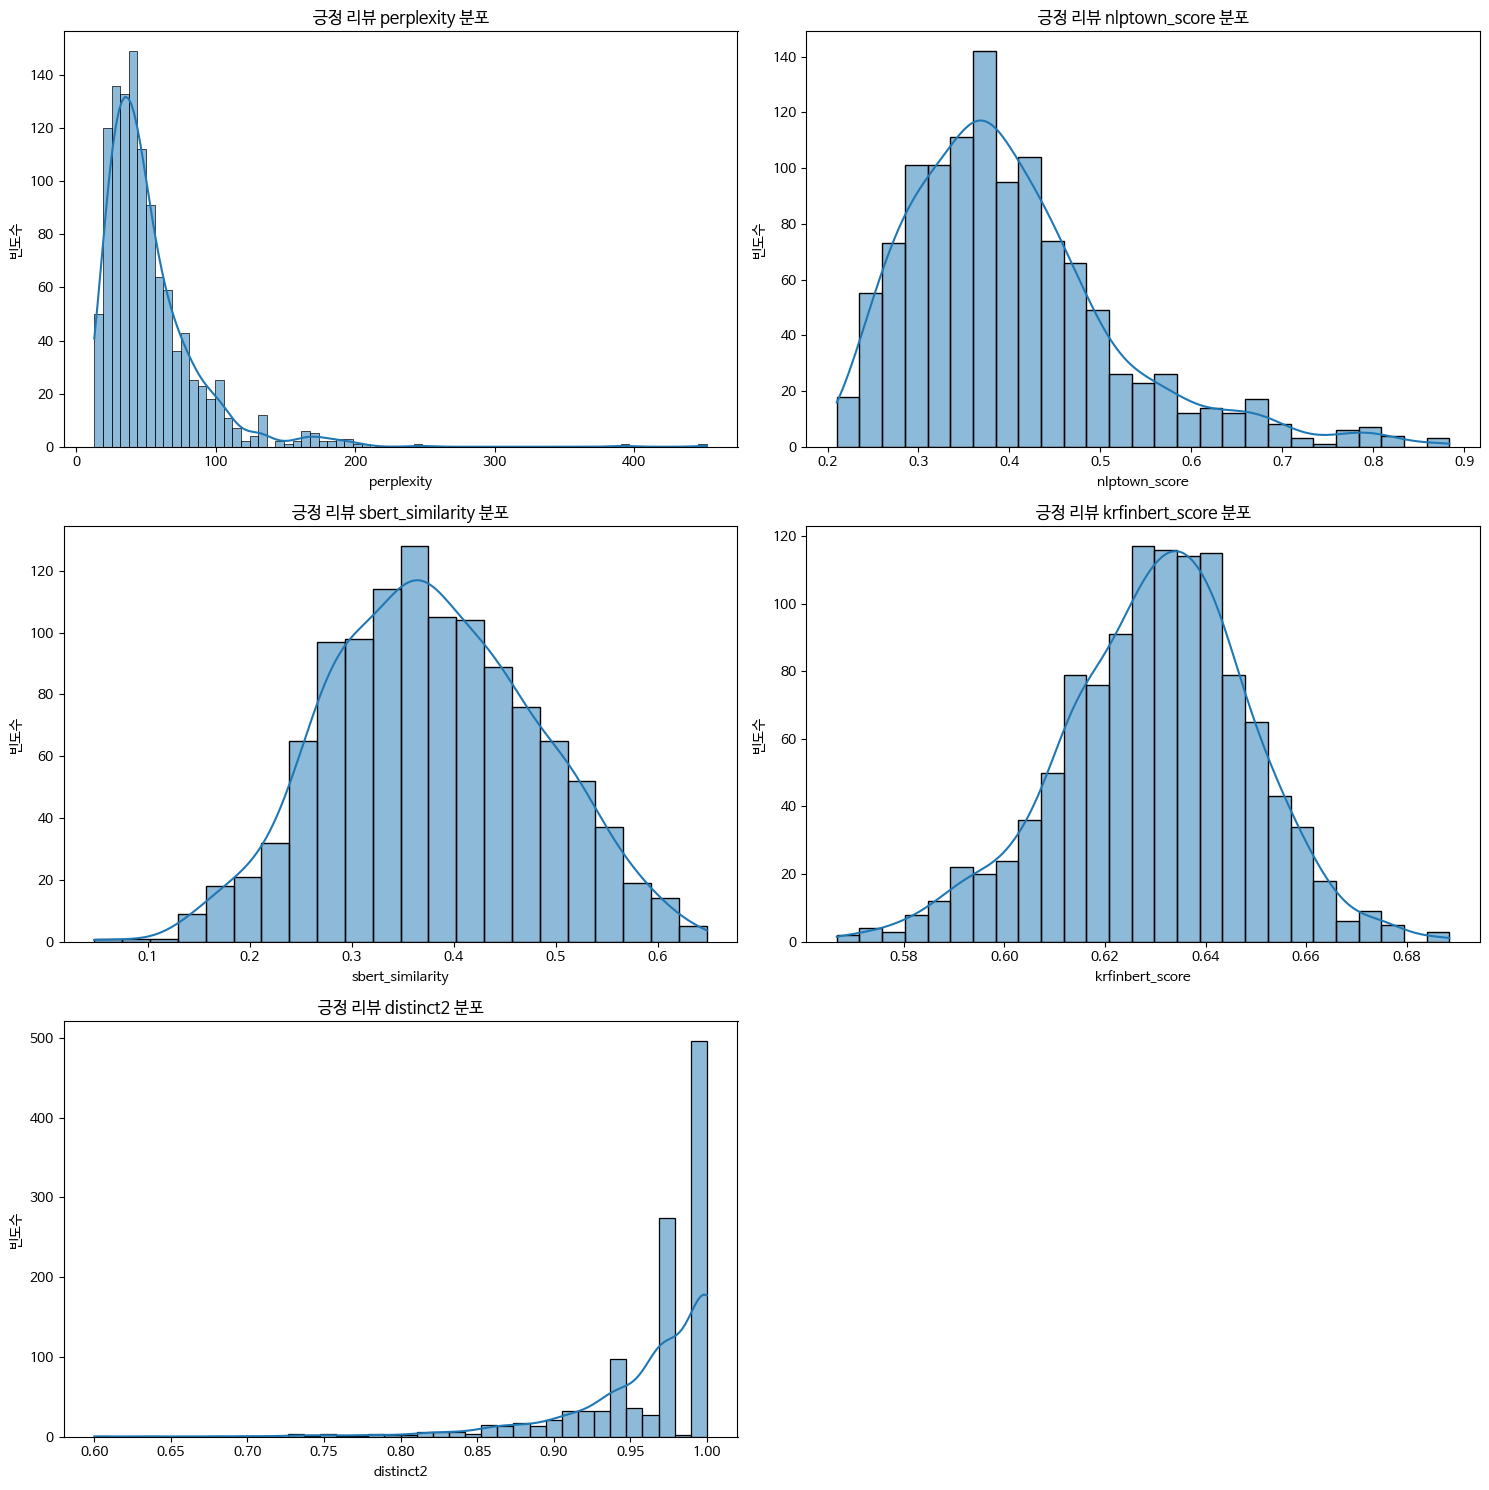

부정 리뷰 평가 지표 시각화


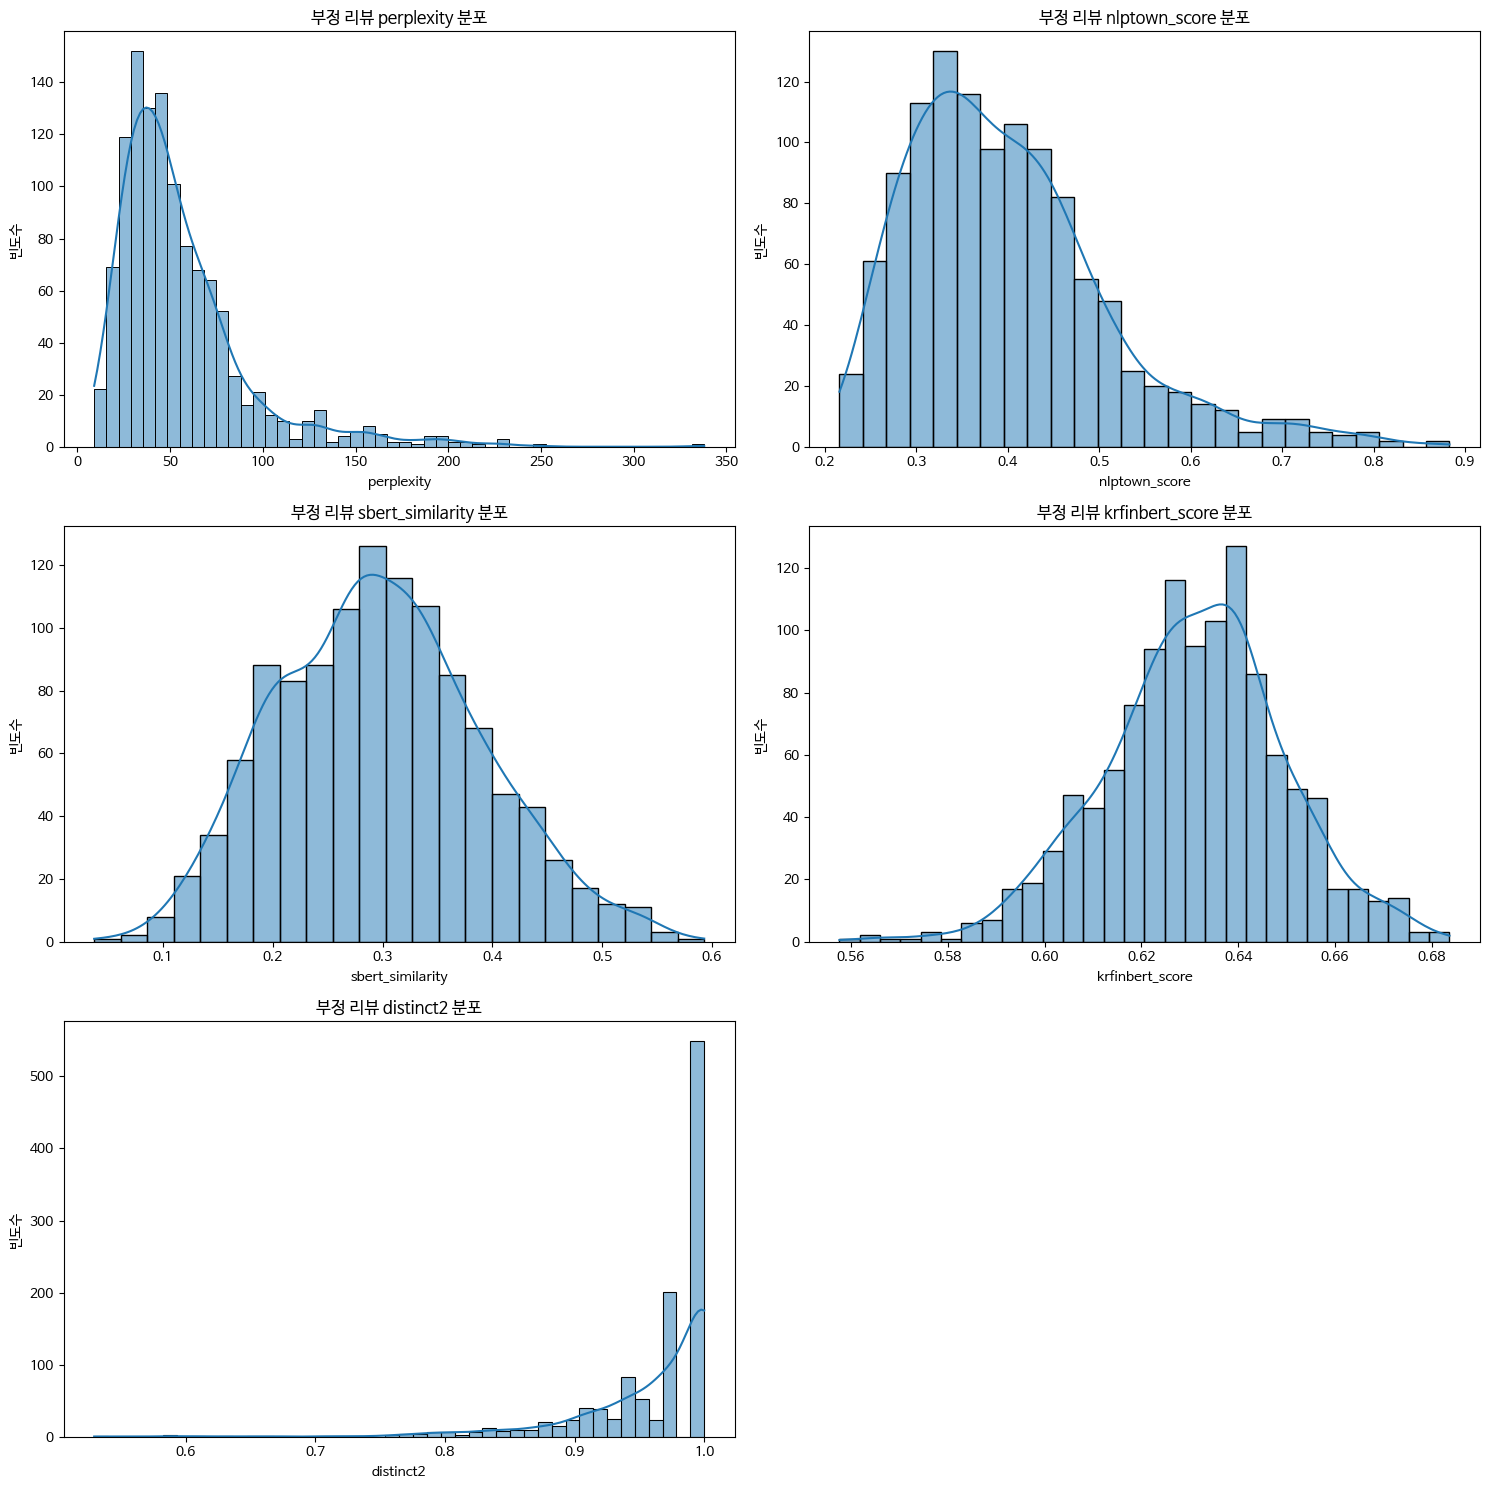

In [ ]:
# 7. 평가 지표 시각화 (긍정 1500개와 부정 1500개 별도)
# df_eval에는 "perplexity", "nlptown_score", "sbert_similarity", "krfinbert_score", "distinct2" 등의 칼럼이 있습니다.
df_positive_eval = df_eval[df_eval['target_sentiment'] == "긍정"]
df_negative_eval = df_eval[df_eval['target_sentiment'] == "부정"]

def visualize_metrics(df_subset, title_prefix=""):
    # 평가 지표: Perplexity, nlptown_score, Sentence-BERT 유사도, KR-FinBERT 감성 점수, Distinct-2
    metrics = ['perplexity', 'nlptown_score', 'sbert_similarity', 'krfinbert_score', 'distinct2']
    # 3행 2열 subplot (총 6개 칸; 빈 칸은 무시)
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    axes = axes.flatten()

    for i, metric in enumerate(metrics):
        sns.histplot(df_subset[metric].dropna(), ax=axes[i], kde=True)
        axes[i].set_title(f"{title_prefix} {metric} 분포")
        axes[i].set_xlabel(metric)
        axes[i].set_ylabel("빈도수")

    # 남는 subplot이 있다면 제거
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

print("긍정 리뷰 평가 지표 시각화")
visualize_metrics(df_positive_eval, title_prefix="긍정 리뷰")

print("부정 리뷰 평가 지표 시각화")
visualize_metrics(df_negative_eval, title_prefix="부정 리뷰")

# 최종 결과 저장
df_generated.to_csv('generated_reviews.csv', index=False, encoding='utf-8-sig')
df_eval.to_csv('evaluation_results.csv', index=False, encoding='utf-8-sig')
